In [164]:
import numpy as np
import os
import tensorflow as tf
import keras
import cv2
import matplotlib.pyplot as plt

In [165]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [166]:
data_dir = "C:/Users/JanRottmayer/Documents/Python Scripts/GPR/B12/B12 Pictures LS"
# the initial image dimension are 500 x 189 -> resizing to receive 3 quadrative images from one!!
width = 492
height = 164
def create_training_data(path,WIDTH=width, HEIGHT=height):
    training_data = []
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array,(WIDTH,HEIGHT))
            training_data.append(new_array[0:164,0:164])
            training_data.append(new_array[0:164,164:328])
            training_data.append(new_array[0:164,328:492])
        except:
            pass
        
    return training_data

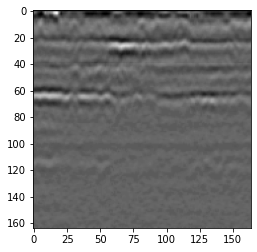

In [167]:
data = create_training_data(data_dir,width,height)
plt.imshow(data[0]);

In [168]:
data = np.array(data).reshape(-1,height,height,1)
data = data.astype('float32') / 255

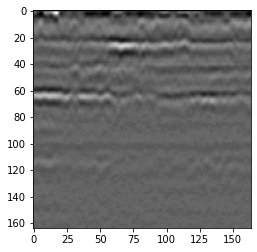

In [169]:
plt.imshow(data[0]);

In [170]:
input_img = keras.Input(shape=(164, 164, 1))
c1 = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
c2 = keras.layers.MaxPooling2D((2, 2), padding='same')(c1)
c3 = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
c4 = keras.layers.MaxPooling2D((2, 2), padding='same')(c3)
c5 = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='valid')(c4)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(c5)

# at this point the representation is (21, 21, 64)

d1 = keras.layers.Conv2DTranspose(filters=64,kernel_size = (3, 3),strides=(1,1), activation='relu', padding='same')(encoded)
u1 = keras.layers.UpSampling2D((2, 2))(d1)
d2 = keras.layers.Conv2DTranspose(filters=64,kernel_size = (3, 3),strides=(1,1), activation='relu', padding='same')(u1)
u2 = keras.layers.UpSampling2D((2, 2))(d2)
d3 = keras.layers.Conv2DTranspose(filters=64,kernel_size = (3, 3),strides=(1,1), activation='relu', padding='valid')(u2)
u3 = keras.layers.UpSampling2D((2, 2))(d3)
decoded = keras.layers.Conv2DTranspose(filters = 1,kernel_size = (3, 3), activation='sigmoid', padding='same')(u3)

encoder = keras.Model(input_img,encoded)
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [171]:
autoencoder.summary()

Model: "functional_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 164, 164, 1)]     0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 164, 164, 64)      640       
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 82, 82, 64)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 82, 82, 64)        36928     
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 41, 41, 64)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 39, 39, 64)        36928     
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 20, 20, 64)      

In [173]:
autoencoder.fit(data,data,validation_split=0.2,epochs=1,batch_size=128,shuffle=True)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
18/18 [==============================] - ETA: 0s - loss: 0.0631 WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000166CB12D288> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
C

In [158]:
prediction = autoencoder.predict(data[0:10])

In [159]:
prediction = prediction *255

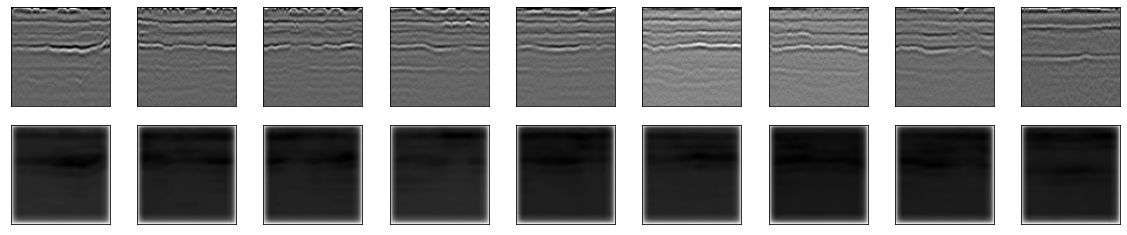

In [162]:
n = 9
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(data[i].reshape(164, 164))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(prediction[i].reshape(164, 164))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()